             duration  star_rating
genre                             
Action     126.485294     7.884559
Adventure  134.840000     7.933333
Animation   96.596774     7.914516
Biography  131.844156     7.862338
Comedy     107.602564     7.822436
Crime      122.298387     7.916935
Drama      126.539568     7.902518
Family     107.500000     7.850000
Fantasy    112.000000     7.700000
Film-Noir   97.333333     8.033333
History     66.000000     8.000000
Horror     102.517241     7.806897
Mystery    115.625000     7.975000
Sci-Fi     109.000000     7.920000
Thriller   114.200000     7.680000
Western    136.666667     8.255556


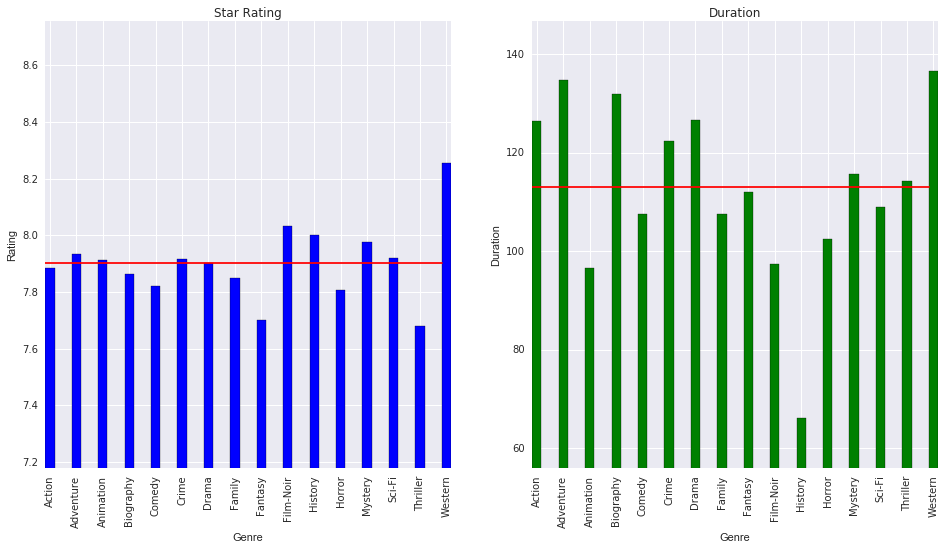

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv')
cols = data.columns
desc = data.describe()
# print(cols) ### Columns
# print(desc) ### Descriptive Stats

genre_pivot = data.pivot_table(index='genre',values=['star_rating','duration'], aggfunc=np.mean)
print(genre_pivot)

width = 0.35
indx = np.arange(len(genre_pivot.index.tolist()))
fig_gen = plt.figure(figsize=(16,8))
ax_star_gen = fig_gen.add_subplot(1,2,1)
ax_duration_gen = fig_gen.add_subplot(1,2,2)

ax_star_gen.set(xticks=(indx+(width/2)),xticklabels=genre_pivot.index,ylim=(min(genre_pivot['star_rating'])-0.5,max(genre_pivot['star_rating'])+0.5),title='Star Rating', xlabel='Genre', ylabel='Rating')
ax_star_gen.bar(indx,genre_pivot['star_rating'],width=0.35, color='blue')
ax_star_gen.plot(indx,[np.mean(genre_pivot['star_rating']) for i in indx],color = 'red')

xlabels = ax_star_gen.get_xticklabels() 
for label in xlabels: 
    label.set_rotation(90)

ax_duration_gen.set(xticks=(indx+(width/2)),xticklabels=genre_pivot.index,ylim=(min(genre_pivot['duration'])-10,max(genre_pivot['duration'])+10),title='Duration', xlabel='Genre', ylabel='Duration')
ax_duration_gen.bar(indx,genre_pivot['duration'],width=0.35, color='green')
ax_duration_gen.plot(indx,[np.mean(genre_pivot['duration']) for i in indx],color = 'red')

xlabels = ax_duration_gen.get_xticklabels() 
for label in xlabels:
    label.set_rotation(90)

plt.show()



(979, 2)
(821, 2)


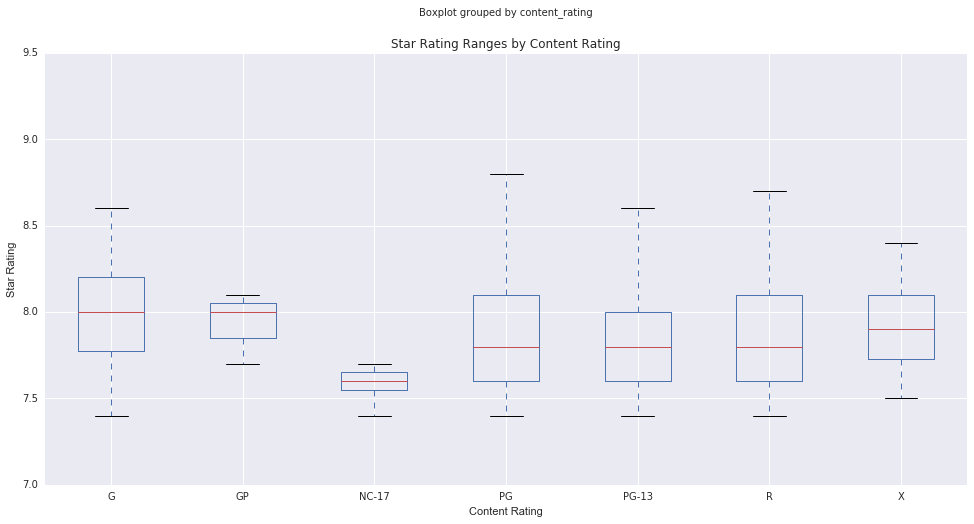

In [85]:
content_data = data[['content_rating','star_rating']]
cont_f = content_data.content_rating
content_clean = content_data[(cont_f!='NOT RATED')&(cont_f!='UNRATED')&(cont_f!='APPROVED')&(cont_f!='PASSED')&(cont_f!='TV-MA')]
print(content_data.shape)
print(content_dropped.shape)

content_clean.boxplot(by='content_rating', figsize=(16,8), grid=True)
plt.xlabel('Content Rating')
plt.ylabel('Star Rating')
plt.title('Star Rating Ranges by Content Rating')

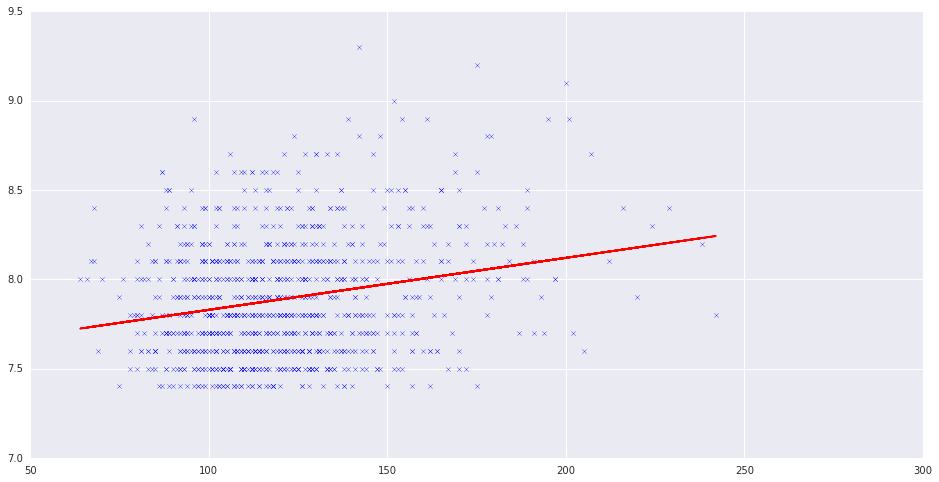

In [102]:
fig_scat = plt.figure(figsize=(16,8))
ax_scat = fig_scat.add_subplot(1,1,1)

fit = np.polyfit(data['duration'], data['star_rating'],1)
ax_scat.scatter(data['duration'], data['star_rating'],marker='x')
ax_scat.plot(data['duration'],(fit[0]*data['duration'])+fit[1], color='red')

plt.show()